In [70]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [71]:
xl = pd.ExcelFile("merged1.xlsx")
xl.sheet_names

['Sheet1']

In [72]:
df = xl.parse("Sheet1")
df.head()

,1574553619579,13.355469,-13.603123,-35.13745,0,0.1,0.2,0.3,0.4,0.5,2
0,1574553619630,13.355469,-13.603123,-35.137450,0.000000,0.000000,0.000000,-0.039981,0.130718,9.727702,2
1,1574553619727,13.355469,-13.603123,-35.137450,0.001737,0.000756,0.000752,-0.039981,0.130718,9.727702,2
2,1574553619779,13.198412,-13.759014,-35.660446,0.001737,0.000756,0.000752,-0.039981,0.130718,9.727702,2
3,1574553619824,13.198412,-13.759014,-35.660446,0.001737,0.000756,0.000752,-0.038066,0.128803,9.717886,2
4,1574553619919,13.198412,-13.759014,-35.660446,0.001493,0.001000,0.001180,-0.038066,0.128803,9.717886,2


In [74]:
df.columns = ["timestamp", "magneto_x", "magneto_y", "magneto_z", "gyro_x", "gyro_y", "gyro_z", "accel_x", "accel_y", 
              "accel_z", "label"]

In [ ]:
df.head()

In [ ]:
df.info()

In [75]:
features = [ "magneto_x", "magneto_y", "magneto_z", "gyro_x", "gyro_y", "gyro_z", "accel_x", "accel_y", 
              "accel_z"]
X = df[features]
X

,magneto_x,magneto_y,magneto_z,gyro_x,gyro_y,gyro_z,accel_x,accel_y,accel_z
0,13.355469,-13.603123,-35.137450,0.000000,0.000000,0.000000,-0.039981,0.130718,9.727702
1,13.355469,-13.603123,-35.137450,0.001737,0.000756,0.000752,-0.039981,0.130718,9.727702
2,13.198412,-13.759014,-35.660446,0.001737,0.000756,0.000752,-0.039981,0.130718,9.727702
3,13.198412,-13.759014,-35.660446,0.001737,0.000756,0.000752,-0.038066,0.128803,9.717886
4,13.198412,-13.759014,-35.660446,0.001493,0.001000,0.001180,-0.038066,0.128803,9.717886
...,...,...,...,...,...,...,...,...,...
40128,22.936758,-40.710567,-18.845306,-0.125934,-0.042764,-0.027161,0.088342,7.281892,6.300311
40129,22.936758,-40.710567,-18.845306,-0.125934,-0.042764,-0.027161,-0.112044,6.958927,6.902426
40130,22.629631,-39.763744,-20.649406,-0.125934,-0.042764,-0.027161,-0.112044,6.958927,6.902426
40131,22.629631,-39.763744,-20.649406,-0.238272,0.067069,0.047121,-0.112044,6.958927,6.902426


In [76]:
target = ["label"]
y = df[target]
y

,label
0,2
1,2
2,2
3,2
4,2
...,...
40128,1
40129,1
40130,1
40131,1


In [77]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import preprocessing
from sklearn import utils
from sklearn import metrics

In [78]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

In [79]:
temp_train = y_train.values.reshape(-1,)
temp_test = y_test.values.reshape(-1,)

for i in range(1,20):
    model = RandomForestClassifier(n_estimators=i)
    model.fit(X_train, temp_train)
    print("Model score for no of trees",i," is : ",model.score(X_test, temp_test))

Model score for no of trees 1  is :  0.9932727046219011
Model score for no of trees 2  is :  0.9921514887255513
Model score for no of trees 3  is :  0.997134670487106
Model score for no of trees 4  is :  0.9972592500311449
Model score for no of trees 5  is :  0.997134670487106
Model score for no of trees 6  is :  0.9978821477513392
Model score for no of trees 7  is :  0.9976329886632614
Model score for no of trees 8  is :  0.9983804659274947
Model score for no of trees 9  is :  0.9983804659274947
Model score for no of trees 10  is :  0.9975084091192227
Model score for no of trees 11  is :  0.9983804659274947
Model score for no of trees 12  is :  0.9988787841036502
Model score for no of trees 13  is :  0.9988787841036502
Model score for no of trees 14  is :  0.9992525227357668
Model score for no of trees 15  is :  0.9983804659274947
Model score for no of trees 16  is :  0.9987542045596113
Model score for no of trees 17  is :  0.9988787841036502
Model score for no of trees 18  is :  0.99

In [ ]:
df2 = pd.DataFrame()

In [82]:
features = [ "magneto_x", "magneto_y", "magneto_z"]
X = df[features]
y = df[target]

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3)


temp_train = y_train.values.reshape(-1,)
temp_test = y_test.values.reshape(-1,)

for i in range(1,20):
    model = RandomForestClassifier(n_estimators=i)
    model.fit(X_train, temp_train)
    print("Model score for no of trees",i," is : ",model.score(X_test, temp_test))

Model score for no of trees 1  is :  0.9926079734219269
Model score for no of trees 2  is :  0.9916112956810631
Model score for no of trees 3  is :  0.9972591362126246
Model score for no of trees 4  is :  0.9965116279069768
Model score for no of trees 5  is :  0.997093023255814
Model score for no of trees 6  is :  0.9975083056478405
Model score for no of trees 7  is :  0.9977574750830565
Model score for no of trees 8  is :  0.998172757475083
Model score for no of trees 9  is :  0.9980897009966777
Model score for no of trees 10  is :  0.9985049833887043
Model score for no of trees 11  is :  0.9990033222591362
Model score for no of trees 12  is :  0.9985049833887043
Model score for no of trees 13  is :  0.9987541528239202
Model score for no of trees 14  is :  0.9980066445182725
Model score for no of trees 15  is :  0.9980897009966777
Model score for no of trees 16  is :  0.9987541528239202
Model score for no of trees 17  is :  0.9987541528239202
Model score for no of trees 18  is :  0.99

In [85]:
model

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=19,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [83]:
X.describe()

,magneto_x,magneto_y,magneto_z
count,40133.000000,40133.000000,40133.000000
mean,6.764649,-27.307862,-17.445066
std,24.577549,17.800659,8.064772
min,-38.560730,-49.372220,-38.063340
25%,-29.429829,-40.267840,-21.397568
50%,20.214737,-38.411144,-17.861351
75%,23.263060,-10.220844,-10.456291
max,38.912956,9.878616,1.384033


In [84]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [86]:
pca = PCA(n_components=3)
principalComponents = pca.fit_transform(X)

principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2', 'principal component 3'])

principalDf

,principal component 1,principal component 2,principal component 3
0,-0.417627,23.299062,1.121827
1,-0.417627,23.299062,1.121827
2,-0.463438,23.582840,0.632067
3,-0.463438,23.582840,0.632067
4,-0.463438,23.582840,0.632067
...,...,...,...
40128,-20.887362,-2.613425,-0.135764
40129,-20.887362,-2.613425,-0.135764
40130,-20.393972,-0.731848,-0.815331
40131,-20.393972,-0.731848,-0.815331


In [87]:
variance = pca.explained_variance_ratio_ #calculate variance ratios
print(variance)

[0.92974335 0.06418126 0.00607539]


In [89]:
finalDf = pd.concat([principalDf, df[['label']]], axis = 1)
finalDf

,principal component 1,principal component 2,principal component 3,label
0,-0.417627,23.299062,1.121827,2
1,-0.417627,23.299062,1.121827,2
2,-0.463438,23.582840,0.632067,2
3,-0.463438,23.582840,0.632067,2
4,-0.463438,23.582840,0.632067,2
...,...,...,...,...
40128,-20.887362,-2.613425,-0.135764,1
40129,-20.887362,-2.613425,-0.135764,1
40130,-20.393972,-0.731848,-0.815331,1
40131,-20.393972,-0.731848,-0.815331,1


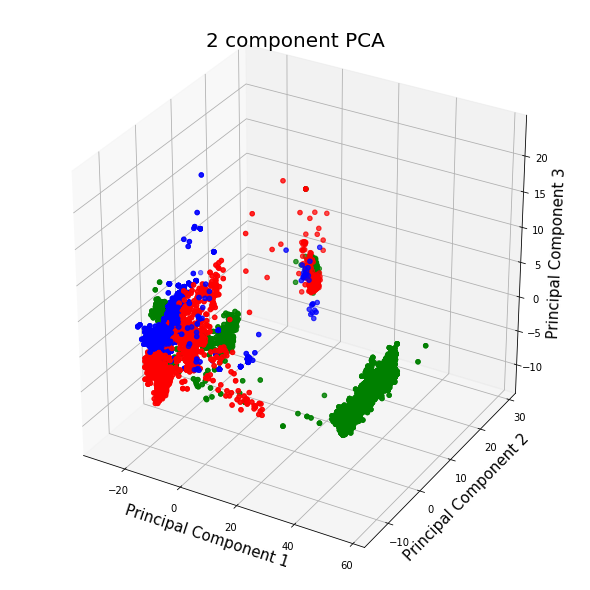

In [95]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize = (8,8))
ax = Axes3D(fig)

ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_zlabel('Principal Component 3', fontsize = 15)

ax.set_title('2 component PCA', fontsize = 20)

#y : has the client subscribed a term deposit? (binary: "yes","no")
# Colors based on value of y.

LABEL_COLOR_MAP = {0 : 'r',1 : 'b', 2 : 'g'}

label_color = [LABEL_COLOR_MAP[l] for l in finalDf['label']]

ax.scatter(finalDf['principal component 1'], finalDf['principal component 2'], finalDf['principal component 3'],
           c=label_color)
